In [4]:
import pandas as pd
import numpy as np
from pathlib import Path

def get_file_names(directory):
    return [f.name for f in Path(directory).iterdir() if f.is_file()]

file_list = []

mode = 'Apoptosis/box'

directory = ['C:/rkka_Projects/Cell/Data/' + mode]
for dir in directory:
    file_names = get_file_names(dir)
    for fn in file_names:
        file_list.append(fn)

file_list

['timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P12.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P15.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P19.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P20.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P26.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P28.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P29.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P34.TCF.h5',
 'timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P35.TCF.h5']

In [5]:
df = pd.DataFrame()
df

""


In [2]:
import h5py
data = h5py.File(r"C:\rkka_Projects\Cell\Data\Apoptosis\box\timelapsed_boxed_compressed_230512.160429.CD95_TNF_Ctr.003.CD95.A1.T001P12.TCF.h5")
box_list = list(data['box'].keys())
time_list =['00h', '12h', '24h', '36h']

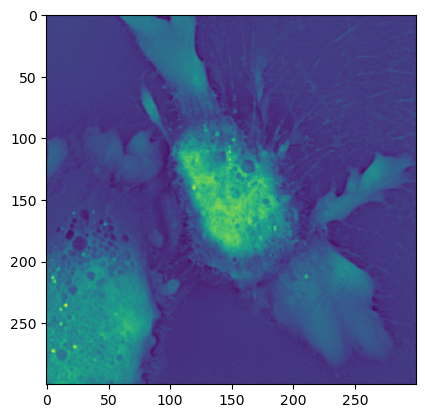

In [24]:
import matplotlib.pyplot as plt
plt.imshow(data['box/002/time/12h'][2])

In [4]:
import napari
import numpy as np

viewer = napari.Viewer()
d = np.array(data['box/002/time/12h'])
viewer.add_image(d)

<Image layer 'd' at 0x2d32199b700>

In [ ]:
viewer.add_image(slices)

<Image layer 'slices' at 0x2d321676fd0>

In [9]:
import tqdm, analysis
from skimage import filters
thresholds = filters.threshold_multiotsu(d, 5)
slices = np.zeros(d.shape)
slices = slices + d
slices[slices<thresholds[1]] = 0
slices = slices.astype(float)


for i, slice in enumerate(slices):
    
    seg = analysis.make_array_3ch(slice)
    seg = analysis.segment_anything(seg)
    
    temp = np.zeros(slice.shape)
    for s in seg:
        # slice * s['segmentation'] : multiplication is important to remove background
        # temp = temp + slice * s['segmentation']
        temp = temp + s['segmentation']
    
    slices[i, :, :] = temp

In [4]:
df = pd.DataFrame()

for sample_n, file in enumerate(file_list):
    t_list = ['0', '12', '24', '36']

    for t in t_list:
        temp = pd.read_csv("C:/rkka_Projects/Cell/Data/" + mode + "/csv/" + file + '(' + t + ').csv')
        temp = temp.fillna(0)
        
        if t == '0':
            t_str = '00h'
        else:
            t_str = t + 'h'

        temp.replace([np.inf, -np.inf], 0, inplace=True)

        df.loc[sample_n, t_str + '_debris_number'] = temp[temp['area']<=100].shape[0]

        df.loc[sample_n, t_str + '_area_sum'] = np.sum(temp[temp['area']>10]['area'])
        df.loc[sample_n, t_str + '_area_mean'] = np.mean(temp[temp['area']>10]['area'])
        df.loc[sample_n, t_str + '_area_std'] = np.std(temp[temp['area']>10]['area'])

        df.loc[sample_n, t_str + '_area_convex_sum'] = np.sum(temp[temp['area']>10]['area_convex'])
        df.loc[sample_n, t_str + '_area_convex_mean'] = np.mean(temp[temp['area']>10]['area_convex'])
        df.loc[sample_n, t_str + '_area_convex_std'] = np.std(temp[temp['area']>10]['area_convex'])

        df.loc[sample_n, t_str + '_axis_major_length_mean'] = np.mean(temp[temp['area']>10]['axis_major_length'])
        df.loc[sample_n, t_str + '_axis_major_length_std'] = np.std(temp[temp['area']>10]['axis_major_length'])

        df.loc[sample_n, t_str + '_euler_number_mean'] = np.mean(temp[temp['area']>10]['euler_number'])

        df.loc[sample_n, t_str + '_extent_mean'] = np.mean(temp[temp['area']>10]['extent'])
        df.loc[sample_n, t_str + '_extent_std'] = np.std(temp[temp['area']>10]['extent'])

        df.loc[sample_n, t_str + '_solidity_mean'] = np.mean(temp[temp['area']>10]['solidity'])
        df.loc[sample_n, t_str + '_solidity_std'] = np.std(temp[temp['area']>10]['solidity'])

df


,00h_debris_number,00h_area_sum,00h_area_mean,00h_area_std,00h_area_convex_sum,00h_area_convex_mean,00h_area_convex_std,00h_axis_major_length_mean,00h_axis_major_length_std,00h_euler_number_mean,...,36h_area_convex_sum,36h_area_convex_mean,36h_area_convex_std,36h_axis_major_length_mean,36h_axis_major_length_std,36h_euler_number_mean,36h_extent_mean,36h_extent_std,36h_solidity_mean,36h_solidity_std
0,119.0,736670.0,6138.916667,28039.677116,1097403.0,9145.025,43894.512752,23.239082,59.442512,0.916667,...,297897.0,6927.837209,15888.092319,24.33643,39.818833,0.465116,0.635821,0.156909,0.646145,0.414235


In [5]:
df.to_csv('morphologies_data/debris_' + mode + '_filtered_morphologies.csv')